In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

from pprint import pprint
from field import *




In [2]:
events = pd.read_csv('events_WC22.csv')

/var/folders/hy/27t6v09s54x9lv_68y2yk65w0000gn/T/ipykernel_63068/633937494.py:1: DtypeWarning: Columns (59,72,76,83,88,96,97,98,100,101,102,103,104,105,106,107,109,110,116,117,119,120,121,122,123,124,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv('events_WC22.csv')


In [3]:
events.shape

(234652, 145)

In [4]:
euro = events[events['competition_season'] == "UEFA Euro_2020"]
cdm = events[events['competition_season'] == "FIFA World Cup_2022"]
cdm_final = cdm[cdm['match_date'] == "2022-12-18"]

In [5]:
cdm.shape


(234652, 145)

In [6]:
import numpy as np

# Tri du dataframe par index pour s'assurer que les événements sont ordonnés dans le temps
df = cdm_final.sort_index()

# Créer une colonne 'PSV' avec des valeurs par défaut de 0
df['PSV'] = 0

# Identifier les indices des tirs dans le dataframe
shoot_indices = df[df['type.name'] == 'Shot'].index

# Calculer le PSV pour chaque séquence de possession
for idx in shoot_indices:
    possession_idx = df.loc[:idx, 'possession'].max()
    possession_events = df[df['possession'] == possession_idx]

    # Calculer le PSV pour la séquence de possession
    total_xG = possession_events['shot.statsbomb_xg'].sum()
    df.loc[df['possession'] == possession_idx, 'PSV'] = total_xG



/var/folders/hy/27t6v09s54x9lv_68y2yk65w0000gn/T/ipykernel_63068/1360227933.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.024542088' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['possession'] == possession_idx, 'PSV'] = total_xG


In [7]:
df["type.name"].unique()



array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block',
       'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Dribble',
       'Shot', 'Goal Keeper', 'Dispossessed', 'Dribbled Past',
       'Injury Stoppage', 'Player Off', 'Player On', 'Offside',
       'Substitution', 'Tactical Shift', 'Shield', '50/50', 'Half End',
       'Bad Behaviour'], dtype=object)

In [8]:
df[df["pass.type.name"] == "Kick Off"]

,match_id,competition_season,match_date,match_outcome,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,carry.end_location,pass.cross,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,under_pressure,clearance.right_foot,clearance.body_part.id,clearance.body_part.name,shot.statsbomb_xg,shot.end_location,shot.technique.id,shot.technique.name,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.outcome.id,shot.outcome.name,shot.first_time,shot.freeze_frame,goalkeeper.end_location,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.type.id,goalkeeper.type.name,pass.assisted_shot_id,pass.shot_assist,shot.key_pass_id,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.body_part.id,goalkeeper.body_part.name,goalkeeper.outcome.id,goalkeeper.outcome.name,off_camera,pass.deflected,counterpress,duel.type.id,duel.type.name,pass.aerial_won,interception.outcome.id,interception.outcome.name,clearance.left_foot,pass.switch,clearance.aerial_won,clearance.head,out,pass.outswinging,pass.technique.id,pass.technique.name,foul_won.defensive,duel.outcome.id,duel.outcome.name,dribble.outcome.id,dribble.outcome.name,shot.one_on_one,pass.cut_back,block.offensive,foul_committed.card.id,foul_committed.card.name,pass.goal_assist,shot.deflected,block.deflection,pass.through_ball,foul_committed.advantage,foul_won.advantage,pass.miscommunication,ball_recovery.recovery_failure,dribble.nutmeg,shot.open_goal,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,foul_committed.type.id,foul_committed.type.name,injury_stoppage.in_chain,bad_behaviour.card.id,bad_behaviour.card.name,shot.aerial_won,pass.no_touch,miscontrol.aerial_won,dribble.overrun,foul_committed.offensive,50_50.outcome.id,50_50.outcome.name,pass.straight,pass.inswinging,ball_recovery.offensive,clearance.other,foul_committed.penalty,foul_won.penalty,dribble.no_touch,shot.follows_dribble,goalkeeper.punched_out,block.save_block,shot.saved_to_post,goalkeeper.shot_saved_to_post,half_start.late_video_start,shot.saved_off_target,goalkeeper.shot_saved_off_target,goalkeeper.success_in_play,shot.redirect,goalkeeper.lost_in_play,PSV
32354,3869685,FIFA World Cup_2022,2022-12-18,0,f651a6c4-55e3-4e0f-a178-59414ba83d6a,5,1,00:00:00.578,0,0,2,0.975702,30,Pass,771,France,9,From Kick Off,771,France,NaN,NaN,['97b5dc82-547a-4f93-a632-a2a8daf5ac98'],"[61.0, 40.1]",5487.0,Antoine Griezmann,19.0,Center Attacking Midfield,10481.0,Aurélien Djani Tchouaméni,13.364505,2.907503,1.0,Ground Pass,"[48.0, 43.2]",38.0,Left Foot,65.0,Kick Off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
33122,3869685,FIFA World Cup_2022,2022-12-18,0,27725fa3-2887-43e0-8d0d-77246e0fb5e0,773,1,00:23:40.420,23,40,33,1.234272,30,Pass,771,France,9,From Kick Off,771,France,NaN,NaN,['0db72b17-bed3-446f-ae22-468480e33ad6'],"[61.0, 40.1]",3604.0,Olivier Giroud,23.0,Center Forward,3026.0,Adrien Rabiot,8.367795,-2.887919,1.0,Ground Pass,"[52.9, 38.0]",38.0,Left Foot,65.0,Kick Off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [9]:
# afficher lignes de chque changement  possession

# Supposons que votre DataFrame s'appelle df
# Triez le DataFrame par 'timestamp' pour vous assurer que les événements sont dans l'ordre chronologique

# Ajoutez une colonne 'change_of_possession' qui indique les changements de possession
df['change_of_possession'] = df['possession'].ne(df['possession'].shift())

# Filtrer les lignes où il y a un changement de possession
change_of_possession_df = df[df['change_of_possession']]

# Afficher les lignes correspondant à chaque changement de possession
df[["minute","possession", "player.name","change_of_possession", "type.name", "PSV", "shot.statsbomb_xg"]].iloc[4050:4110]

#change_of_possession_df[["minute","second","possession", "player.name","change_of_possession", "type.name", "PSV", "shot.statsbomb_xg"]].head(60)


,minute,possession,player.name,change_of_possession,type.name,PSV,shot.statsbomb_xg
36400,107,228,Leandro Daniel Paredes,True,Ball Recovery,0.592476,NaN
36401,107,228,Leandro Daniel Paredes,False,Carry,0.592476,NaN
36402,107,228,Leandro Daniel Paredes,False,Pass,0.592476,NaN
36403,107,228,Gonzalo Ariel Montiel,False,Ball Receipt*,0.592476,NaN
36404,107,228,Gonzalo Ariel Montiel,False,Carry,0.592476,NaN
36405,107,228,Gonzalo Ariel Montiel,False,Pass,0.592476,NaN
36406,107,228,Lautaro Javier Martínez,False,Ball Receipt*,0.592476,NaN
36407,107,228,Lautaro Javier Martínez,False,Pass,0.592476,NaN
36408,107,228,Lionel Andrés Messi Cuccittini,False,Ball Receipt*,0.592476,NaN
36409,107,228,Lionel Andrés Messi Cuccittini,False,Carry,0.592476,NaN


In [10]:
# create expected threat map
import matplotlib.pyplot as plt
import matplotlib.patches as patches





In [11]:
df["type.name"].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block',
       'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Dribble',
       'Shot', 'Goal Keeper', 'Dispossessed', 'Dribbled Past',
       'Injury Stoppage', 'Player Off', 'Player On', 'Offside',
       'Substitution', 'Tactical Shift', 'Shield', '50/50', 'Half End',
       'Bad Behaviour'], dtype=object)

In [12]:
obv_type= ['Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block',
       'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Dribble',
       'Shot', 'Goal Keeper', 'Dispossessed', 'Dribbled Past','Offside']

In [13]:
df = df[df["type.name"].isin(obv_type)]

In [14]:
df["x"] = df["location"].apply(lambda x: x.split(",")[0][1:]).astype(float)
df["y"] = df["location"].apply(lambda x: x.split(",")[1][:-1]).astype(float)

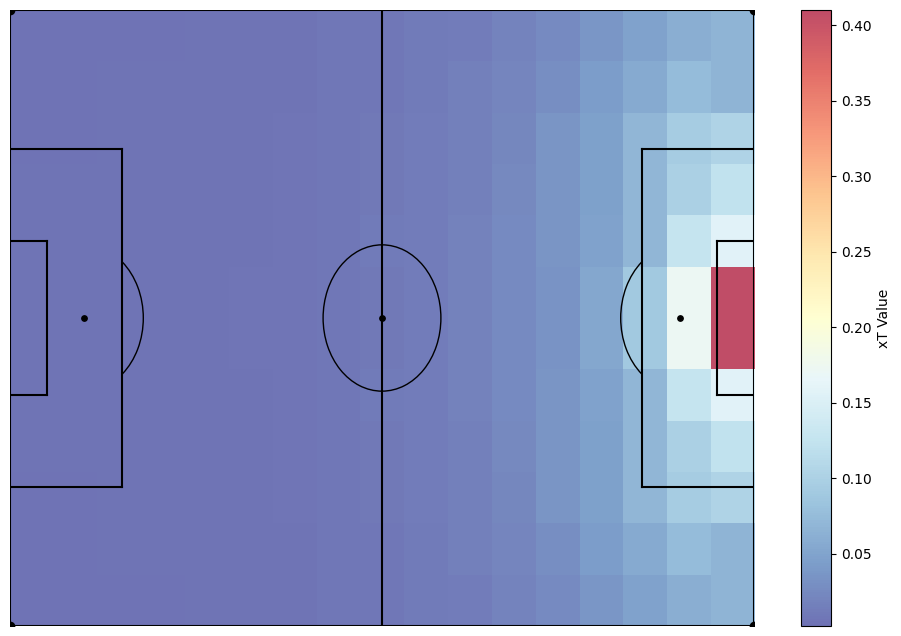

In [15]:

# Provided probabilities for the 6 first rows (mirrored for the 6 following rows)
# Since we have 12 rows in total, we'll assume the pitch is divided into 12 rows (y-coordinate)
# and 16 columns (x-coordinate), giving us zones of 10 units wide (120/12) and 5 units tall (80/16)
prob_rows = np.array([
    [0.2, 0.3, 0.3, 0.3, 0.4, 0.4, 0.5, 0.7, 0.8, 1, 1.3, 1.8, 2.5, 3.7, 4.8, 6, 6.6],
    [0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.7, 0.8, 1.1, 1.5, 2, 2.9, 4.2, 5.6, 7.5, 6.6],
    [0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.6, 0.7, 0.9, 1.2, 1.6, 2.2, 3.4, 4.6, 6.8, 9.4, 10.3],
    [0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.6, 0.7, 0.9, 1.2, 1.6, 2.3, 3.4, 4.6, 6.8, 9.9, 12.3],
    [0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.6, 0.7, 1, 1.3, 1.7, 2.5, 3.4, 4.8, 6.8, 12.6, 15.8],
    [0.4, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.8, 0.9, 1.3, 1.7, 2.5, 3.3, 5.2, 8.9, 17.1, 41]
])

# Mirror the probabilities to create a full 12x16 grid
xT_values = np.vstack((prob_rows, np.flipud(prob_rows)))

# Normalize the probabilities to a scale of 0-1 (dividing by 100 since they were given as percentages)
xT_values /= 100

# Function to map location to xT value
def map_location_to_xT(x,y, xT_values):
    # Map the x and y coordinates to the xT grid
    xT_x = min(int(np.floor(float(x) / 120 * 16)), 15)
    xT_y = min(int(np.floor(float(y) / 80 * 12)), 11)
    return xT_values[xT_y, xT_x]

# Apply the function to the DataFrame
df['xT'] = df.apply(lambda row: map_location_to_xT(row['x'], row['y'], xT_values), axis=1)

# Plot the xT values on the pitch
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 120)
ax.set_ylim(0, 80)
ax.axis('off')

# Plot the xT values heatmap
xT_heatmap = ax.imshow(xT_values, extent=(0, 120, 0, 80), aspect='auto', cmap='RdYlBu_r',
                       alpha=0.7)


# Add a colorbar
cbar = plt.colorbar(xT_heatmap)
cbar.set_label('xT Value')

plot_field(ax)






In [16]:
# columns containing "end_location" in the name
df.columns[df.columns.str.contains("pass")]


Index(['pass.recipient.id', 'pass.recipient.name', 'pass.length', 'pass.angle',
       'pass.height.id', 'pass.height.name', 'pass.end_location',
       'pass.body_part.id', 'pass.body_part.name', 'pass.type.id',
       'pass.type.name', 'pass.cross', 'pass.outcome.id', 'pass.outcome.name',
       'pass.assisted_shot_id', 'pass.shot_assist', 'shot.key_pass_id',
       'pass.deflected', 'pass.aerial_won', 'pass.switch', 'pass.outswinging',
       'pass.technique.id', 'pass.technique.name', 'pass.cut_back',
       'pass.goal_assist', 'pass.through_ball', 'pass.miscommunication',
       'pass.no_touch', 'pass.straight', 'pass.inswinging'],
      dtype='object')

In [17]:
df["shot.outcome.name"].unique()


array([nan, 'Saved', 'Blocked', 'Off T', 'Goal', 'Wayward'], dtype=object)

In [18]:
df["pass.outcome.name"].unique()

array([nan, 'Out', 'Incomplete', 'Unknown', 'Pass Offside'], dtype=object)

In [19]:
df["dribble.outcome.name"].unique()

array([nan, 'Incomplete', 'Complete'], dtype=object)

In [20]:
df.loc[(df["pass.outcome.name"].isnull())& (df["type.name"] == "Pass"), "pass.outcome.name"] = "Complete"
df.loc[(df["pass.outcome.id"].isnull()) & (df["type.name"] == "Pass"), "pass.outcome.id"] = 8.

df["pass.outcome.name"].unique()

array(['Complete', nan, 'Out', 'Incomplete', 'Unknown', 'Pass Offside'],
      dtype=object)

In [21]:
df[df["pass.outcome.name"].isnull()]["type.name"].unique()

array(['Ball Receipt*', 'Carry', 'Pressure', 'Foul Committed', 'Foul Won',
       'Ball Recovery', 'Block', 'Miscontrol', 'Clearance', 'Duel',
       'Interception', 'Dribble', 'Shot', 'Goal Keeper', 'Dispossessed',
       'Dribbled Past', 'Offside'], dtype=object)

In [22]:
def get_outcome(row):
    if row["type.name"] == "Pass":
        return row["pass.outcome.name"]
    elif row["type.name"] == "Dribble":
        return row["dribble.outcome.name"]
    elif row["type.name"] == "Shot":
        return row["shot.outcome.name"]
    else:
        return None
    
df["outcome"] = df.apply(get_outcome, axis=1)

df["outcome"].unique()


array(['Complete', None, 'Out', 'Incomplete', 'Unknown', 'Pass Offside',
       'Saved', 'Blocked', 'Off T', 'Goal', 'Wayward'], dtype=object)

In [72]:
# end_location est une colonne qui contient les coordonnées de fin de chaque événement. pass_end_location si different de null, shot_end_location si different de null et carry_end_location si different de null

def get_end_location(row):
    if pd.notnull(row['pass.end_location']):
        return row['pass.end_location']
    elif pd.notnull(row['shot.end_location']):
        return row['shot.end_location']
    elif pd.notnull(row['carry.end_location']):
        return row['carry.end_location']
    elif row["type.name"] == "Dribble":
        # return end_location of next event
        row_index = row.name
        next_index = row_index + 1
        if next_index in df.index:  # Vérifie si le prochain index existe
            next_event = df.loc[next_index]
            return next_event.get("carry.end_location")
    else:
        return None

df['end_location'] = df.apply(get_end_location, axis=1)
df['end_x'] = df.apply(lambda row: float(row['end_location'].split(",")[0]) if pd.notnull(row['end_location']) else None, axis=1)
df['end_y'] = df.apply(lambda row: float(row['end_location'].split(",")[1]) if pd.notnull(row['end_location']) else None, axis=1)
df['end_z'] = df.apply(lambda row: float(row['end_location'].split(",")[-1]) if pd.notnull(row['end_location']) and row['type.name'] == 'Shot' else 0, axis=1)


df['xT.end'] = df.apply(lambda row: map_location_to_xT(row['end_x'], row['end_y'], xT_values) if pd.notnull(row['end_location']) else None, axis=1)

In [73]:
df.iloc[230:240][["type.name", "player.name", "outcome", "end_location", "carry.end_location", "end_x", "end_y", "end_z", "xT", "xT.end"]]

,type.name,player.name,outcome,end_location,carry.end_location,end_x,end_y,end_z,xT,xT.end
32584,Carry,Theo Bernard François Hernández,None,"[54.2, 15.1]","[54.2, 15.1]",54.2,15.1,0.0,0.010,0.007
32585,Pressure,Rodrigo Javier De Paul,None,None,NaN,NaN,NaN,0.0,0.004,NaN
32586,Pressure,Enzo Fernandez,None,None,NaN,NaN,NaN,0.0,0.008,NaN
32587,Dribbled Past,Enzo Fernandez,None,None,NaN,NaN,NaN,0.0,0.009,NaN
32588,Dribble,Theo Bernard François Hernández,Complete,"[46.5, 34.4]",NaN,46.5,34.4,0.0,0.007,0.006
32589,Carry,Theo Bernard François Hernández,None,"[46.5, 34.4]","[46.5, 34.4]",46.5,34.4,0.0,0.007,0.006
32590,Pass,Theo Bernard François Hernández,Complete,"[40.7, 54.7]",NaN,40.7,54.7,0.0,0.006,0.005
32591,Ball Receipt*,Jules Koundé,None,None,NaN,NaN,NaN,0.0,0.005,NaN
32592,Carry,Jules Koundé,None,"[37.9, 54.7]","[37.9, 54.7]",37.9,54.7,0.0,0.005,0.005
32593,Pass,Jules Koundé,Complete,"[34.5, 34.8]",NaN,34.5,34.8,0.0,0.005,0.005


In [74]:
# j'aimerais verifier que pour tous les x de end_location  plus grandes que x de location on a bien xT.end > xT
df["xT.end"] = df["xT.end"].fillna(0)
df["xT"] = df["xT"].fillna(0)

df_non_null = df.dropna(subset=["end_location", "location"])

# actions vers l'avant dans un df
df_forward = df_non_null[df_non_null['end_location'].apply(lambda x: float(x.split(",")[0][1:])) > df_non_null['location'].apply(lambda x: float(x.split(",")[0][1:]))]


df_forward["forwar"] = df_forward.apply(lambda row: row['xT.end'] >= row['xT'], axis=1)
df_forward[df_forward["forwar"] == False][['location', "end_location",'xT','xT.end', 'forwar', "type.name","minute","second", "player.name",  "team.name", "possession_team.name"]]


/var/folders/hy/27t6v09s54x9lv_68y2yk65w0000gn/T/ipykernel_58776/3592088776.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forward["forwar"] = df_forward.apply(lambda row: row['xT.end'] >= row['xT'], axis=1)


,location,end_location,xT,xT.end,forwar,type.name,minute,second,player.name,team.name,possession_team.name
32377,"[21.7, 24.5]","[26.6, 3.1]",0.004,0.003,False,Pass,0,45,Nicolás Hernán Otamendi,Argentina,Argentina
32397,"[27.0, 45.9]","[32.1, 54.5]",0.005,0.004,False,Carry,1,19,Cristian Gabriel Romero,Argentina,Argentina
32413,"[72.3, 13.4]","[73.6, 4.7]",0.012,0.010,False,Pass,1,33,Adrien Rabiot,France,France
32476,"[54.8, 37.8]","[56.5, 60.5]",0.008,0.007,False,Pass,3,43,Enzo Fernandez,Argentina,Argentina
32513,"[37.5, 45.1]","[38.8, 46.8]",0.006,0.005,False,Carry,4,19,Kylian Mbappé Lottin,France,France
...,...,...,...,...,...,...,...,...,...,...,...
36459,"[17.6, 36.9]","[43.5, 3.6]",0.005,0.004,False,Pass,111,26,Hugo Lloris,France,France
36487,"[3.3, 68.6]","[5.6, 79.3]",0.003,0.002,False,Pass,111,55,Raphaël Varane,France,Argentina
36499,"[114.1, 9.2]","[116.0, 4.7]",0.075,0.060,False,Pass,112,57,Lautaro Javier Martínez,Argentina,Argentina
36523,"[86.3, 49.6]","[87.1, 69.7]",0.025,0.020,False,Pass,114,22,Youssouf Fofana,France,France


In [104]:
pos = "[120.0, 37.6, 1.3]"
pos.split(",")[0][1:]
pos.split(",")[1]

' 37.6'

In [75]:
df["diff_xT"] = df["xT.end"] - df["xT"]

In [76]:
# sum of xT for each player
df.groupby("player.name")["diff_xT"].sum().sort_values(ascending=False)


player.name
Hugo Lloris                        0.176
Paulo Bruno Exequiel Dybala        0.063
Damián Emiliano Martínez           0.023
Leandro Daniel Paredes             0.018
Germán Alejandro Pezzella         -0.005
Gonzalo Ariel Montiel             -0.054
Ibrahima Konaté                   -0.073
Kingsley Coman                    -0.085
Antoine Griezmann                 -0.175
Youssouf Fofana                   -0.250
Eduardo Camavinga                 -0.281
Ousmane Dembélé                   -0.282
Lautaro Javier Martínez           -0.335
Raphaël Varane                    -0.338
Nahuel Molina Lucero              -0.370
Dayotchanculle Upamecano          -0.383
Nicolás Hernán Otamendi           -0.404
Aurélien Djani Tchouaméni         -0.483
Cristian Gabriel Romero           -0.531
Theo Bernard François Hernández   -0.553
Jules Koundé                      -0.585
Olivier Giroud                    -0.646
Nicolás Alejandro Tagliafico      -0.668
Rodrigo Javier De Paul            -0.689
Adri

In [101]:
# sum of xT for each team
# (df.groupby("player.name")["diff_xT"].sum()/ df["player.name"].value_counts()).sort_values(ascending=False)

In [78]:
df[df["player.name"] == "Lionel Andrés Messi Cuccittini"][['location', "end_location",'diff_xT','xT','xT.end', "type.name","minute","second", "player.name",  "team.name", "possession_team.name"]]

,location,end_location,diff_xT,xT,xT.end,type.name,minute,second,player.name,team.name,possession_team.name
32434,"[77.5, 36.9]",None,-0.017,0.017,0.000,Ball Receipt*,2,16,Lionel Andrés Messi Cuccittini,Argentina,Argentina
32435,"[77.5, 36.9]","[76.6, 35.7]",0.000,0.017,0.017,Carry,2,16,Lionel Andrés Messi Cuccittini,Argentina,Argentina
32437,"[76.6, 35.7]","[116.2, 8.9]",0.058,0.017,0.075,Pass,2,16,Lionel Andrés Messi Cuccittini,Argentina,Argentina
32445,"[100.4, 57.7]",None,-0.046,0.046,0.000,Ball Receipt*,2,26,Lionel Andrés Messi Cuccittini,Argentina,Argentina
32446,"[100.4, 57.7]","[99.3, 57.3]",0.000,0.046,0.046,Carry,2,26,Lionel Andrés Messi Cuccittini,Argentina,Argentina
...,...,...,...,...,...,...,...,...,...,...,...
36677,"[74.1, 34.6]","[92.2, 29.9]",0.021,0.013,0.034,Pass,121,59,Lionel Andrés Messi Cuccittini,Argentina,Argentina
36698,"[58.0, 62.4]",None,-0.007,0.007,0.000,Ball Receipt*,122,52,Lionel Andrés Messi Cuccittini,Argentina,Argentina
36699,"[58.0, 62.4]","[66.8, 62.6]",0.002,0.007,0.009,Carry,122,52,Lionel Andrés Messi Cuccittini,Argentina,Argentina
36700,"[66.8, 62.6]","[104.9, 62.6]",0.037,0.009,0.046,Pass,122,54,Lionel Andrés Messi Cuccittini,Argentina,Argentina


In [79]:
df["type.name"].unique()

array(['Pass', 'Ball Receipt*', 'Carry', 'Pressure', 'Foul Committed',
       'Foul Won', 'Ball Recovery', 'Block', 'Miscontrol', 'Clearance',
       'Duel', 'Interception', 'Dribble', 'Shot', 'Goal Keeper',
       'Dispossessed', 'Dribbled Past', 'Offside'], dtype=object)

In [80]:
dc = ["Dribble","Carry"]
best_carries = df[(df["type.name"].isin(dc))&(df["shot.outcome.name"]!= "Blocked")&(df["shot.outcome.name"]!= "Wayward")][['end_y', 'end_z','location', "end_location",'diff_xT','xT','xT.end', "dribble.outcome.name","minute","second","period", "player.name",  "team.name", "possession_team.name"]].sort_values(by="diff_xT", ascending=False)

best_carries.sort_values(by="diff_xT", ascending=False).head(10)

,end_y,end_z,location,end_location,diff_xT,xT,xT.end,dribble.outcome.name,minute,second,period,player.name,team.name,possession_team.name
36125,22.8,0.0,"[90.7, 23.3]","[115.3, 22.8]",0.065,0.034,0.099,Complete,98,49,3,Kylian Mbappé Lottin,France,France
36126,22.8,0.0,"[90.7, 23.3]","[115.3, 22.8]",0.065,0.034,0.099,NaN,98,49,3,Kylian Mbappé Lottin,France,France
34359,62.0,0.0,"[96.5, 60.0]","[117.7, 62.0]",0.060,0.034,0.094,NaN,50,34,2,Kylian Mbappé Lottin,France,Argentina
36415,52.0,0.0,"[109.3, 56.9]","[114.4, 52.0]",0.058,0.068,0.126,NaN,107,56,4,Lautaro Javier Martínez,Argentina,Argentina
33224,65.8,0.0,"[81.1, 73.9]","[111.9, 65.8]",0.055,0.013,0.068,NaN,28,26,1,Lionel Andrés Messi Cuccittini,Argentina,Argentina
34578,22.4,0.0,"[76.6, 8.9]","[112.1, 22.4]",0.053,0.015,0.068,NaN,59,39,2,Ángel Fabián Di María Hernández,Argentina,Argentina
35776,23.3,0.0,"[79.4, 11.3]","[110.6, 23.3]",0.053,0.015,0.068,NaN,98,23,2,Julián Álvarez,Argentina,Argentina
34497,73.5,0.0,"[62.7, 69.2]","[114.7, 73.5]",0.052,0.008,0.060,NaN,56,37,2,Jules Koundé,France,France
35763,66.7,0.0,"[90.8, 75.2]","[116.2, 66.7]",0.050,0.025,0.075,NaN,98,8,2,Kingsley Coman,France,France
35762,66.7,0.0,"[90.8, 75.2]","[116.2, 66.7]",0.050,0.025,0.075,Complete,98,8,2,Kingsley Coman,France,France


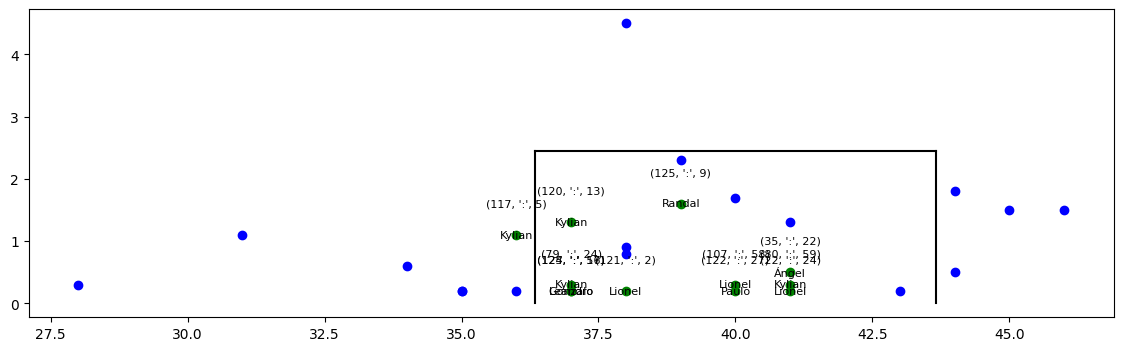

In [96]:
# Taille du but (en mètres)
goal_width = 7.32  # Largeur du but de football standard
goal_height = 2.44  # Hauteur du but de football standard

best_shots = df[(df["type.name"] == "Shot") & (df["end_z"] < 5)]

# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(14, 4))


# dessiner le goal sachant que le centre du goal est à y = 40 et z = 0
ax.plot([40 - goal_width / 2, 40 - goal_width / 2], [0, goal_height], color='black')
ax.plot([40 + goal_width / 2, 40 + goal_width / 2], [0, goal_height], color='black')
ax.plot([40 - goal_width / 2, 40 + goal_width / 2], [goal_height, goal_height], color='black') 

# Afficher les coordonnées xT pour chaque tir
for i, shot in best_shots.iterrows():
    # Dessiner un cercle pour chaque tir
    if shot['shot.outcome.name'] == 'Goal':
        ax.plot(shot['end_y'], shot['end_z'], 'o', color='green')
        ax.text(shot['end_y'], shot['end_z'], shot['player.name'].split(" ")[0], color='black', fontsize=8, ha='center', va='center')
        ax.text(shot['end_y'], shot['end_z']+0.5, (shot['minute'], ":", shot["second"]), color='black', fontsize=8, ha='center', va='center')

    else:
        ax.plot(shot['end_y'], shot['end_z'], 'o', color='blue')
    # Afficher le nom abregé du joueur pour chaque tir
    # ax.text(shot['end_y'], shot['end_z'], shot['player.name'].split(" ")[0], color='black', fontsize=8, ha='center', va='center')
    



In [100]:
best_shots[best_shots["shot.outcome.name"] == "Goal"][['end_x','end_y', 'end_z','shot.end_location', 'player.name', 'shot.outcome.name', 'minute', 'second']]

,end_x,end_y,end_z,shot.end_location,player.name,shot.outcome.name,minute,second
33120,120.0,41.0,0.2,"[120.0, 41.8, 0.2]",Lionel Andrés Messi Cuccittini,Goal,22,24
33527,120.0,41.0,0.5,"[120.0, 41.7, 0.5]",Ángel Fabián Di María Hernández,Goal,35,22
35277,120.0,37.0,0.3,"[120.0, 37.3, 0.3]",Kylian Mbappé Lottin,Goal,79,24
35336,120.0,41.0,0.3,"[120.0, 41.5, 0.3]",Kylian Mbappé Lottin,Goal,80,59
36419,120.0,40.0,0.3,"[120.0, 40.9, 0.3]",Lionel Andrés Messi Cuccittini,Goal,107,58
36552,120.0,36.0,1.1,"[120.0, 36.7, 1.1]",Kylian Mbappé Lottin,Goal,117,5
36738,120.0,37.0,1.3,"[120.0, 37.6, 1.3]",Kylian Mbappé Lottin,Goal,120,13
36740,120.0,38.0,0.2,"[120.0, 38.3, 0.2]",Lionel Andrés Messi Cuccittini,Goal,121,2
36744,120.0,40.0,0.2,"[120.0, 40.4, 0.2]",Paulo Bruno Exequiel Dybala,Goal,122,27
36748,120.0,37.0,0.2,"[120.0, 37.6, 0.2]",Leandro Daniel Paredes,Goal,124,16


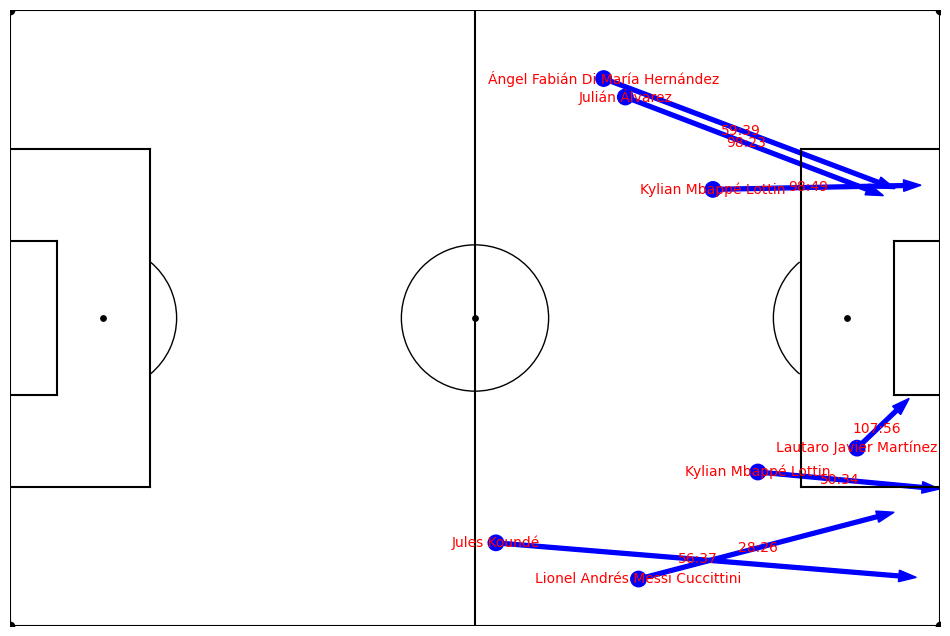

In [48]:
#plot the event on the pitch with arrows for the carry from location to end_location
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set the pitch dimensions
ax.set_xlim(0, 120)
ax.set_ylim(0, 80)
ax.axis('off')

# Plot the events
for index, row in best_carries.iterrows():
    if row['type.name'] == 'Carry':
        # Get the start and end coordinates
        start_x, start_y = map(float, row['location'][1:-1].split(','))
        end_x, end_y = map(float, row['end_location'][1:-1].split(','))
        start_y = 80 - start_y
        end_y = 80 - end_y
        

        # Plot the arrow
        arrow = patches.FancyArrow(start_x, start_y, end_x - start_x, end_y - start_y, width=0.5, color='blue')
        ax.add_patch(arrow)
        # Add a circle at the start
        circle = patches.Circle((start_x, start_y), 1, color='blue')
        ax.add_patch(circle)

        # Add player.name text at the start
        ax.text(start_x, start_y, row['player.name'], ha='center', va='center', color='red')

        # Add minute and second text at the midlle of the arrow
        ax.text((start_x + end_x)/2, (start_y + end_y)/2, f"{row['minute']}:{row['second']}", ha='center', va='center', color='red')



plot_field(ax)




